#**In this project, we will predict whether a customer will leave the bank or not based on many factors**

In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('/content/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**1. Display random 5 Rows of the Dataset**

In [4]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7884,7885,15616530,Foran,638,France,Male,36,6,188455.19,1,0,0,47031.40,1
2012,2013,15780124,Blair,841,France,Male,74,9,108131.53,1,0,1,60830.38,0
3829,3830,15744200,Ni,587,France,Female,36,1,70784.27,1,1,0,30579.82,0
1074,1075,15682618,Jamieson,535,France,Female,31,7,111855.04,2,1,1,36278.89,0
2703,2704,15627352,Bulgakov,459,Germany,Male,46,7,110356.42,1,1,0,4969.13,1


**2.Get information about dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**3.Check null values**

In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**4.Check Duplicacy**

In [7]:
df.duplicated().sum()

0

**5.Get Overall Statistics about the dataset**

In [8]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

**6.Dropping Irrelevent Features**

In [10]:
df=df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [11]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4328,581,France,Female,55,6,0.00,1,1,1,22442.13,0
482,798,France,Male,37,8,0.00,3,0,0,110783.28,0
5516,592,France,Male,37,3,96651.03,1,1,1,3232.82,0
1470,568,Germany,Female,31,1,61592.14,2,1,1,61796.64,0
2592,505,Germany,Male,40,6,47869.69,2,1,1,155061.97,0


**7.Encoding Categorical data**

In [12]:
df['Gender'].unique()


array(['Female', 'Male'], dtype=object)

In [13]:
df=pd.get_dummies(df,drop_first=True)
df.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
1411,685,30,4,84958.60,2,0,1,194343.72,0,True,False,False
4049,618,33,4,0.00,2,1,1,77550.18,0,False,True,True
9764,601,40,10,98627.13,2,0,0,77977.69,0,False,False,True
2966,511,45,5,68375.27,1,1,0,193160.25,1,False,False,True
314,744,36,2,153804.44,1,1,1,87213.33,0,False,True,True


In [14]:
df['Geography_Germany'] = df['Geography_Germany'].astype(int)
df['Geography_Spain'] = df['Geography_Spain'].astype(int)
df['Gender_Male'] = df['Gender_Male'].astype(int)

In [ ]:
df.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
4381,492,39,7,0.00,2,0,1,71323.23,0,0,0,1
6812,576,63,3,148843.56,1,1,0,69414.13,1,1,0,1
2412,754,38,2,0.00,2,1,0,180698.32,0,0,0,1
6684,562,57,3,0.00,3,1,0,6554.97,1,0,0,0
8948,583,48,3,91246.53,1,1,0,60017.46,1,0,0,1


**8.NOT Handling Imbalanced**

In [15]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [16]:
import seaborn as sns


<ipython-input-17-a088e3e50e86>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited',data=df,palette='Set1')


<Axes: xlabel='Exited', ylabel='count'>

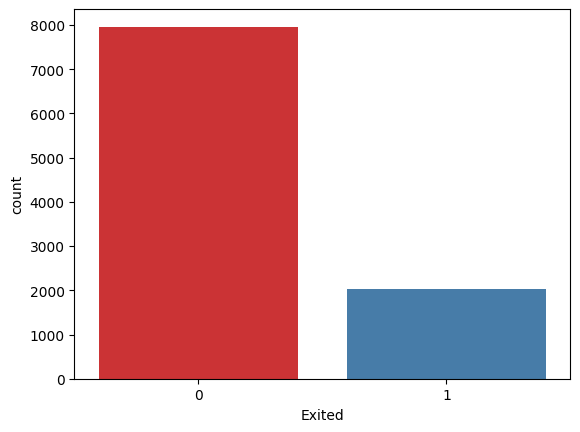

In [17]:
sns.countplot(x='Exited',data=df,palette='Set1')

In [18]:
X=df.drop('Exited',axis=1)
y=df['Exited']

**9.Handling Embalanced Data With SMOTE**

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
X_res,y_res=SMOTE().fit_resample(X,y)

In [33]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

**10.Spliting The Dataset into The Training Set And Test Set**

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42)

**11.Features Scaling**

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [37]:
X_train

array([[ 0.39007235,  0.70892826, -0.65765834, ..., -0.571066  ,
        -0.46350557, -0.8399337 ],
       [ 1.10215749,  0.10491256, -1.39249147, ..., -0.571066  ,
        -0.46350557,  1.19057016],
       [ 0.55439969, -0.096426  ,  1.17942447, ..., -0.571066  ,
        -0.46350557, -0.8399337 ],
       ...,
       [ 0.20383469,  0.20558185,  1.17942447, ..., -0.571066  ,
        -0.46350557,  1.19057016],
       [ 0.24765532,  0.00424328,  0.81200791, ..., -0.571066  ,
        -0.46350557, -0.8399337 ],
       [ 0.53248938,  1.01093611, -1.39249147, ...,  1.75111109,
        -0.46350557,  1.19057016]])

#**12.Logistic Regression**

In [38]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [39]:
y_pred1=lr.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.808

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [28]:
precision_score(y_test,y_pred1)

0.5891472868217055

In [29]:
recall_score(y_test,y_pred1)

0.18673218673218672

In [30]:
f1_score(y_test,y_pred1)

0.2835820895522388

**13.After handling the embalanced data**

In [41]:
accuracy_score(y_test,y_pred1)

0.7859384808537351

In [40]:
precision_score(y_test,y_pred1)

0.77338355304457

In [42]:
recall_score(y_test,y_pred1)

0.7933032839665164

In [43]:
f1_score(y_test,y_pred1)

0.7832167832167831

#**14.Random Forest Classifier**

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
y_pred2=rf.predict(X_test)

In [46]:
precision_score(y_test,y_pred2)

0.8601036269430051

In [47]:
recall_score(y_test,y_pred2)

0.8551191242755957

In [48]:
accuracy_score(y_test,y_pred2)

0.8615819209039548

#**15.Gradient Boosting Classifier**

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [50]:
y_pred3=gb.predict(X_test)

In [51]:
precision_score(y_test,y_pred3)

0.840702210663199

In [52]:
recall_score(y_test,y_pred3)

0.8325820991629105

In [53]:
f1_score(y_test,y_pred3)

0.8366224522808152

In [54]:
accuracy_score(y_test,y_pred3)

0.8414940364092907

In [55]:
final_data=pd.DataFrame({'Models':['LR','RF','GB'],'Accuracy':[accuracy_score(y_test,y_pred1),accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3)]})

In [56]:
final_data

,Models,Accuracy
0,LR,0.785938
1,RF,0.861582
2,GB,0.841494


<Axes: xlabel='Models', ylabel='Accuracy'>

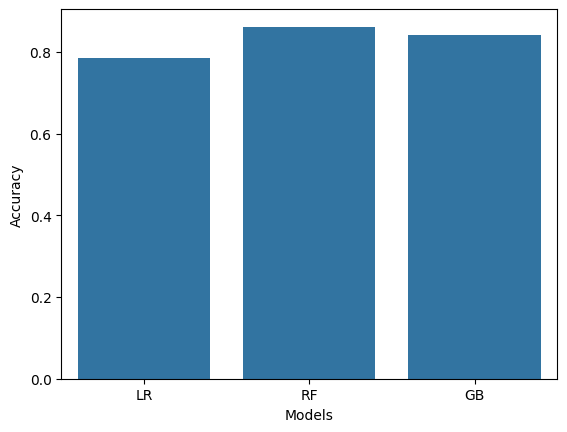

In [57]:
import seaborn as sns
sns.barplot(x='Models',y='Accuracy',data=final_data)

In [58]:
final_data=pd.DataFrame({'Models':['LR','RF','GB'],'PRE':[precision_score(y_test,y_pred1),precision_score(y_test,y_pred2),precision_score(y_test,y_pred3)]})

In [59]:
final_data

,Models,PRE
0,LR,0.773384
1,RF,0.860104
2,GB,0.840702


<Axes: xlabel='Models', ylabel='PRE'>

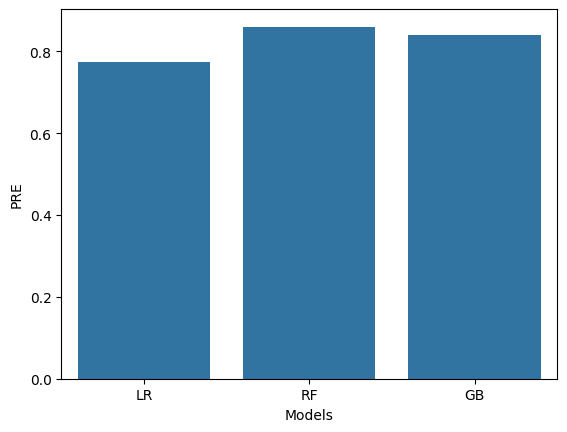

In [61]:

sns.barplot(x='Models',y='PRE',data=final_data)

#**16.Save The Model**




In [62]:
X_res=sc.fit_transform(X_res)

In [63]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [64]:
import joblib

In [65]:
joblib.dump(rf,'churn_Prediction_Model')

['churn_Prediction_Model']

In [66]:
Model=joblib.load('churn_Prediction_Model')

In [67]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [68]:
Model.predict([[688,32,2,100000000,0,0,0,10000045.8,0,0,0]])

array([1])